In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib

FEATURE EXTRACION

In [3]:
df=pd.read_csv('landmark_data.csv')
df.head()

,File,x0,y0,z0,x1,y1,z1,x2,y2,z2,...,x475,y475,z475,x476,y476,z476,x477,y477,z477,Emotion_Label
0,00a7cb9cf18d3a015a9e932952f942fd4bcad8044bcef5...,0.462853,0.703957,-0.063871,0.435659,0.596392,-0.137474,0.455995,0.625306,-0.070197,...,0.629235,0.404544,-0.045084,0.609650,0.420665,-0.045084,0.623387,0.444919,-0.045084,Angry
1,00b7e4551ffa57ff4e2311b2ce156a6c964c642abcacff...,0.508222,0.686624,-0.083488,0.500030,0.595476,-0.149186,0.500274,0.622715,-0.080414,...,0.644312,0.372752,0.024835,0.618640,0.398970,0.024835,0.646608,0.424549,0.024835,Angry
2,0118d3f7d8cbda624679c102f3a09282a7a73018d6fcd1...,0.509734,0.693084,-0.087336,0.482070,0.598624,-0.144905,0.498920,0.631458,-0.081799,...,0.622521,0.381526,0.006120,0.604547,0.401713,0.006120,0.623848,0.423134,0.006120,Angry
3,016e982434c5ffc7ee2fdc353befd030a420183dcb9b32...,0.498339,0.678165,-0.099707,0.516150,0.572861,-0.153686,0.509856,0.605556,-0.088777,...,0.654815,0.423852,0.043983,0.624069,0.439265,0.043983,0.646687,0.465086,0.043983,Angry
4,01b4484e9f51114bbdaceb1e6b3d00f2708dc04831f051...,0.517820,0.715426,-0.058513,0.517744,0.649572,-0.139796,0.519360,0.667633,-0.065651,...,0.635671,0.402298,-0.004279,0.612029,0.427482,-0.004279,0.641158,0.446615,-0.004279,Angry


In [4]:
#Constructing better features which directly correlate with facial expressions

df['Lips_Width'] = df['x291'] - df['x61']  # Lips Width
df['Mouth_Open'] = df['y14'] - df['y13']  # Mouth Open
df['Left_Eyebrow_Height'] = df['y105'] - df['y159']  # Left Eyebrow Height
df['Right_Eyebrow_Height'] = df['y334'] - df['y386']  # Right Eyebrow Height
df['Eyebrow_Distance'] = df['x300'] - df['x70']  # Eyebrow Distance
df['Left_Eye_Open'] = df['y145'] - df['y159']  # Left Eye Open
df['Right_Eye_Open'] = df['y374'] - df['y386']  # Right Eye Open
df.head(10)

,File,x0,y0,z0,x1,y1,z1,x2,y2,z2,...,y477,z477,Emotion_Label,Lips_Width,Mouth_Open,Left_Eyebrow_Height,Right_Eyebrow_Height,Eyebrow_Distance,Left_Eye_Open,Right_Eye_Open
0,00a7cb9cf18d3a015a9e932952f942fd4bcad8044bcef5...,0.462853,0.703957,-0.063871,0.435659,0.596392,-0.137474,0.455995,0.625306,-0.070197,...,0.444919,-0.045084,Angry,0.224177,0.090446,-0.070555,-0.072776,0.465846,0.038056,0.015269
1,00b7e4551ffa57ff4e2311b2ce156a6c964c642abcacff...,0.508222,0.686624,-0.083488,0.500030,0.595476,-0.149186,0.500274,0.622715,-0.080414,...,0.424549,0.024835,Angry,0.207821,0.056741,-0.070191,-0.078557,0.497896,0.040415,0.048878
2,0118d3f7d8cbda624679c102f3a09282a7a73018d6fcd1...,0.509734,0.693084,-0.087336,0.482070,0.598624,-0.144905,0.498920,0.631458,-0.081799,...,0.423134,0.006120,Angry,0.253172,0.115293,-0.101597,-0.082792,0.506784,0.039305,0.036121
3,016e982434c5ffc7ee2fdc353befd030a420183dcb9b32...,0.498339,0.678165,-0.099707,0.516150,0.572861,-0.153686,0.509856,0.605556,-0.088777,...,0.465086,0.043983,Angry,0.218937,0.081344,-0.105221,-0.090757,0.541032,0.029181,0.024051
4,01b4484e9f51114bbdaceb1e6b3d00f2708dc04831f051...,0.517820,0.715426,-0.058513,0.517744,0.649572,-0.139796,0.519360,0.667633,-0.065651,...,0.446615,-0.004279,Angry,0.222070,0.136360,-0.089854,-0.101528,0.552522,0.024098,0.038405
5,02bc9437f479433dd373fd91f024bea7751f22504f4be1...,0.519213,0.666062,-0.084462,0.510607,0.584639,-0.148032,0.516860,0.610969,-0.084593,...,0.441149,0.013482,Angry,0.260376,0.136927,-0.077221,-0.091876,0.500837,0.028749,0.036819
6,02f48695d0888b9c0f14dd7bf81d12baac81f4fb6717c3...,0.536685,0.697772,-0.092578,0.594080,0.602280,-0.134573,0.562054,0.637172,-0.081722,...,0.497327,0.096096,Angry,0.244845,0.131680,-0.097909,-0.093883,0.449489,0.043361,0.034691
7,03a1406d10206dcb781bb9861b5e483a9f921eab924703...,0.494282,0.755210,-0.014743,0.504848,0.688436,-0.128522,0.500365,0.697350,-0.042457,...,0.439970,-0.044900,Angry,0.207065,0.011489,-0.083205,-0.087788,0.566920,0.040777,0.037996
8,03fe5bcebc12a0285ed15485e73e4c27b5c86801d2e0e0...,0.463055,0.763351,-0.005264,0.475748,0.713211,-0.152882,0.477283,0.718701,-0.043616,...,0.418870,-0.082493,Angry,0.279682,0.000805,-0.085871,-0.076735,0.709271,0.069007,0.059816
9,04a6eb972d5563355cf88dbaa860bfd00a12b0030f30c4...,0.493367,0.731639,-0.044549,0.498773,0.644213,-0.159175,0.496426,0.660012,-0.063727,...,0.403725,-0.028135,Angry,0.240766,-0.000274,-0.057064,-0.056500,0.628200,0.040029,0.050227


C:\Users\Dell\AppData\Local\Temp\ipykernel_20396\1721551703.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mutual Information', y='Feature', data=top_30_mi, palette='coolwarm')


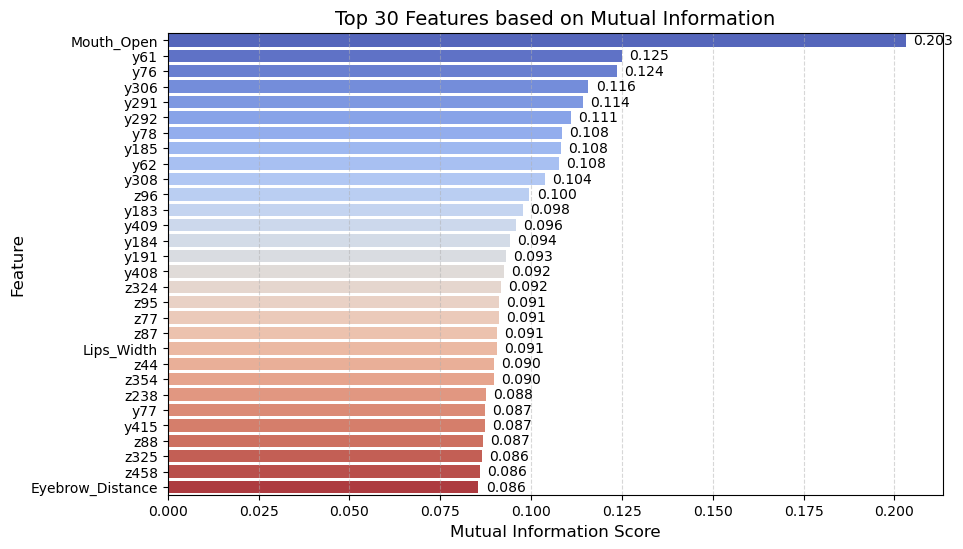

In [5]:
# Compute Mutual Information
X = df.drop(columns=['Emotion_Label', 'File'])
y = df['Emotion_Label']
mi_scores = mutual_info_classif(X, y)

mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi_scores})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)  

top_30_mi = mi_df.head(30)

plt.figure(figsize=(10, 6))
sns.barplot(x='Mutual Information', y='Feature', data=top_30_mi, palette='coolwarm')

for index, value in enumerate(top_30_mi["Mutual Information"]):
    plt.text(value + 0.002, index, f"{value:.3f}", va='center', fontsize=10)

plt.xlabel('Mutual Information Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top 30 Features based on Mutual Information', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()


TRAINING ANN

In [6]:
# Split data and scale using Standard scaler and one hot encode thecategorical labels
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.to_numpy())
one_hot_encoder=OneHotEncoder(sparse_output=False)
y_train_one_hot_encoded=one_hot_encoder.fit_transform(y_train.values.reshape(-1,1))

X_test_scaled=scaler.transform(X_test.to_numpy())
y_test_one_hot_encoded=one_hot_encoder.transform(y_test.values.reshape(-1,1))

In [7]:
#Model Archtechture

num_classes = y_train_one_hot_encoded.shape[1]


X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_one_hot_encoded, dtype=torch.float32)  


train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

class ANN(nn.Module):
    def __init__(self, input_size, hidden_size1=128, hidden_size2=64, hidden_size3=32, output_size=7):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.bn1 = nn.BatchNorm1d(hidden_size1)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.3)

        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.bn2 = nn.BatchNorm1d(hidden_size2)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.3)

        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.bn3 = nn.BatchNorm1d(hidden_size3)
        self.relu3 = nn.ReLU()

        self.fc4 = nn.Linear(hidden_size3, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.dropout1(x)

        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.dropout2(x)

        x = self.fc3(x)
        x = self.bn3(x)
        x = self.relu3(x)

        x = self.fc4(x)
        return x

model = ANN(input_size=X_train_tensor.shape[1], output_size=num_classes)

Epoch 10/120, Loss: 0.5537, Accuracy: 0.7835
Epoch 20/120, Loss: 0.5016, Accuracy: 0.8062
Epoch 30/120, Loss: 0.4784, Accuracy: 0.8190
Epoch 40/120, Loss: 0.4627, Accuracy: 0.8185
Epoch 50/120, Loss: 0.4538, Accuracy: 0.8206
Epoch 60/120, Loss: 0.4514, Accuracy: 0.8295
Epoch 70/120, Loss: 0.4346, Accuracy: 0.8338
Epoch 80/120, Loss: 0.4253, Accuracy: 0.8322
Epoch 90/120, Loss: 0.4123, Accuracy: 0.8435
Epoch 100/120, Loss: 0.4081, Accuracy: 0.8465
Epoch 110/120, Loss: 0.4058, Accuracy: 0.8483
Epoch 120/120, Loss: 0.4074, Accuracy: 0.8390


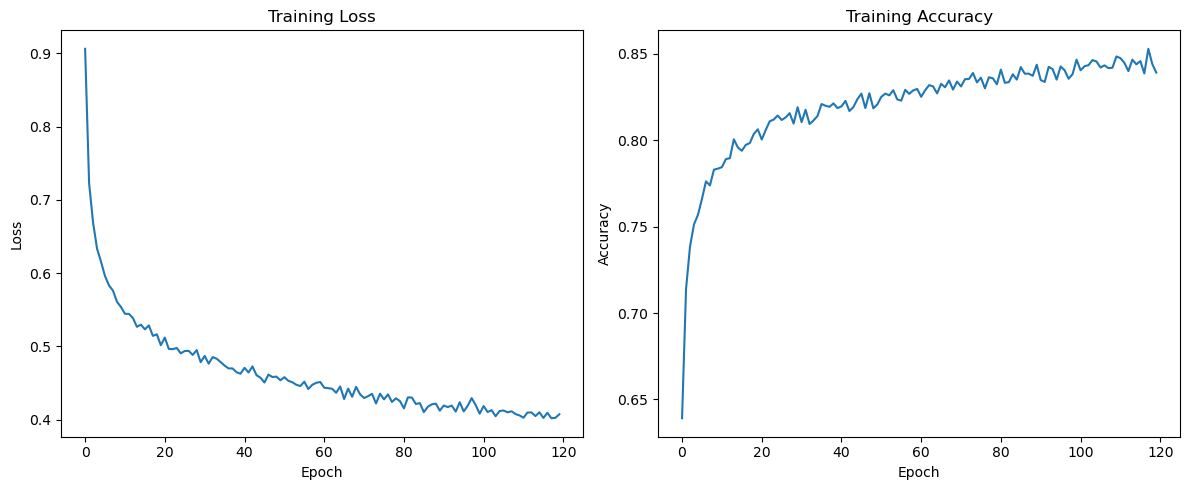

In [8]:
#Training Loop
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.001)

epochs = 120
train_losses = []
train_accuracies = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        
        outputs = model(inputs)
        target_classes = torch.argmax(labels, dim=1)
        loss = criterion(outputs, target_classes)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == target_classes).sum().item()
    
    epoch_loss = running_loss / len(train_dataset)
    epoch_acc = correct / total
    
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.tight_layout()
plt.show()

Test Accuracy: 0.8482


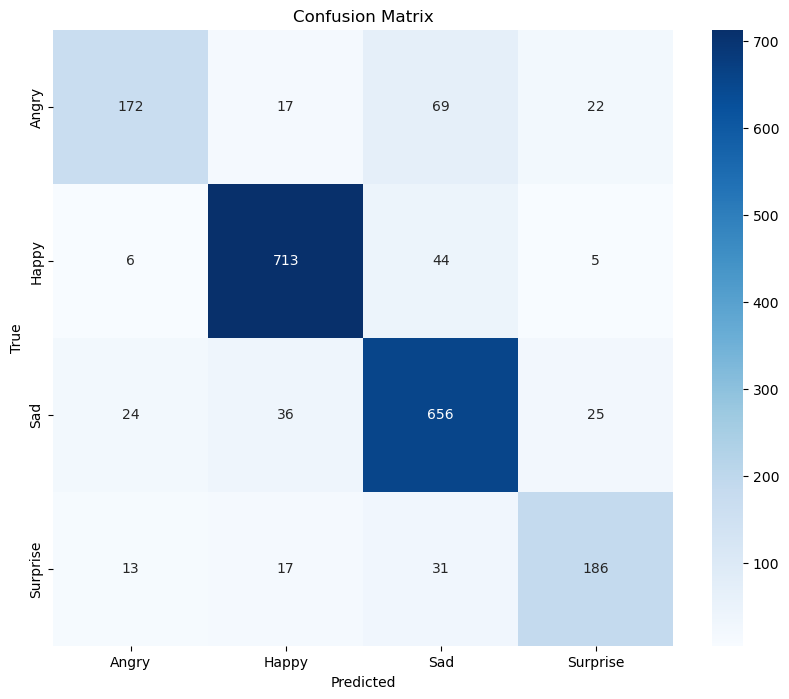

In [9]:
#Evaluate the model metrics
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_one_hot_encoded, dtype=torch.float32)

model.eval()
with torch.no_grad():
    
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs.data, 1)
    y_test_classes = torch.argmax(y_test_tensor, dim=1)
    
    test_accuracy = accuracy_score(y_test_classes.numpy(), predicted.numpy())
    print(f'Test Accuracy: {test_accuracy:.4f}')
    
    conf_matrix = confusion_matrix(y_test_classes.numpy(), predicted.numpy())
    
    class_names = one_hot_encoder.categories_[0]
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

In [ ]:
#Save the model
torch.save(model.state_dict(), 'emotion_model_weights.pth')

In [ ]:
# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Save the one-hot encoder
joblib.dump(one_hot_encoder, 'one_hot_encoder.pkl')


['one_hot_encoder_1.pkl']